# Cold War Simulation Analysis
## Experiment 1 -- Original model replication, book data

In [1]:
import copy
import pickle
import random
from collections import defaultdict, namedtuple, Counter
from itertools import combinations, permutations
import os

import numpy as np
import scipy.stats

import pandas as pd
import networkx as nx
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

# Loading original data

In [2]:
book_data = pd.read_csv("BDM_ColdWar.csv")
book_data.Position = (book_data.Position + 100)/200

In [3]:
book_data.head(36)

,Country,Capability,Position
0,Argentina,0.972,0.9480
1,Australia,0.889,0.5065
2,Belgium,1.182,0.5140
3,Brazil,0.993,0.9480
4,Bulgaria,0.345,0.0000
5,Canada,1.610,0.7810
6,China,11.941,0.5065
7,Czechoslovakia,1.401,0.0450
8,Denmark,0.240,0.5065
9,Egypt,0.408,0.5160


# Data serialization

In [4]:
class Model_Output:
    def __init__(self, model):
        '''
        Store data from model run.
        '''
        self.agent_vars = model.datacollector.get_agent_vars_dataframe()
        self.model_vars = model.datacollector.get_model_vars_dataframe()
        self.log = model.log

In [5]:
model_runs = []
filename = "data_output/ColdWar_Experiment1_5.pickle"
with open(filename, "rb") as f:
    model_runs += pickle.load(f)

In [6]:
len(model_runs)

1000

# Analyzing median positions

In [7]:
all_dfs = []
for i, model in enumerate(model_runs):
    df = model.model_vars.copy()
    df.reset_index(inplace=True)
    df.rename(columns={"index": "Step"}, inplace=True)
    df["Iteration"] = i
    all_dfs.append(df)
results = pd.concat(all_dfs)

In [8]:
results.tail()

,Step,Mean,Median,Iteration
20,20,0.518971,0.508591,999
21,21,0.642225,0.515346,999
22,22,0.530561,0.515346,999
23,23,0.586086,0.515346,999
24,24,0.541166,0.508591,999


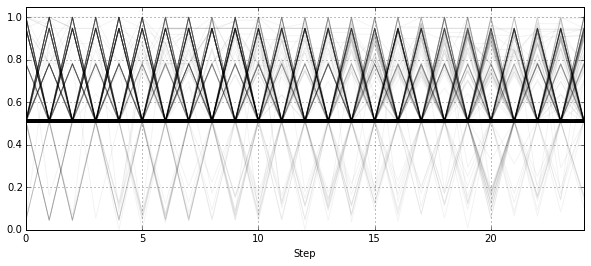

In [9]:
# Plot all runs
fig, ax = plt.subplots(figsize=(10, 4))
for i, group in results.groupby("Iteration"):
    group.plot(x="Step", y="Median", color='k', alpha=0.05, ax=ax, legend=False)

ax.set_ylim(0, 1.05)
ax.grid(True)

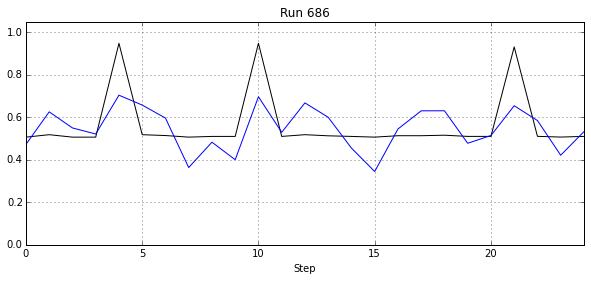

In [10]:
# Pick one trace at random
fig, ax = plt.subplots(figsize=(10, 4))
i = random.randint(0, 1299)
subset = results[results.Iteration==i]
subset.plot(x="Step", y="Median", color='k', ax=ax, legend=False)
subset.plot(x="Step", y="Mean", color='b', ax=ax, legend=False)

ax.set_ylim(0, 1.05)
ax.set_title("Run " + str(i))
ax.grid(True)

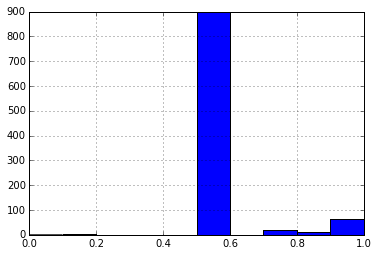

In [11]:
results[results.Step==24]["Median"].hist(bins=np.linspace(0, 1, 11))

**Look at only runs where one side "wins".**

In [12]:
# Get iterations where US wins
us_win = results[(results.Step==24) & (results.Median>0.8)]["Iteration"].unique()

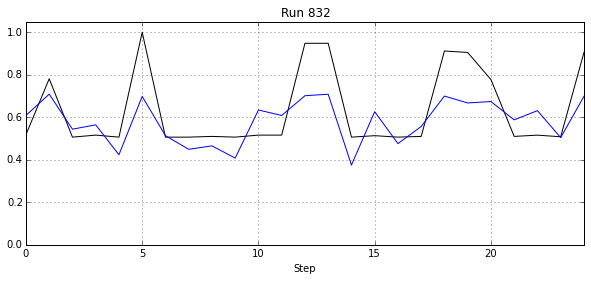

In [13]:
# Plot US victories
fig, ax = plt.subplots(figsize=(10, 4))
i = random.choice(us_win)
subset = results[results.Iteration==i]
subset.plot(x="Step", y="Median", color='k', ax=ax, legend=False)
subset.plot(x="Step", y="Mean", color='b', ax=ax, legend=False)

ax.set_ylim(0, 1.05)
ax.set_title("Run " + str(i))
ax.grid(True)

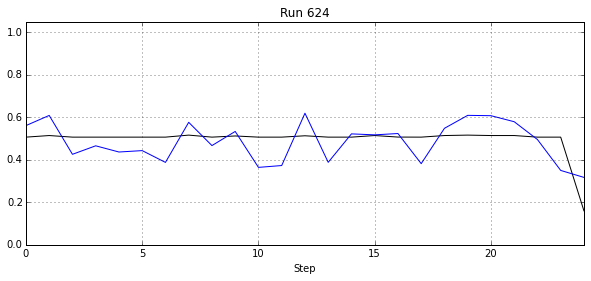

In [14]:
# Get iterations where USSR wins
ussr_win = results[(results.Step==24) & (results.Median<0.2)]["Iteration"].unique()
fig, ax = plt.subplots(figsize=(10, 4))
i = random.choice(ussr_win)
subset = results[results.Iteration==i]
subset.plot(x="Step", y="Median", color='k', ax=ax, legend=False)
subset.plot(x="Step", y="Mean", color='b', ax=ax, legend=False)

ax.set_ylim(0, 1.05)
ax.set_title("Run " + str(i))
ax.grid(True)

In [15]:
len(ussr_win)

5

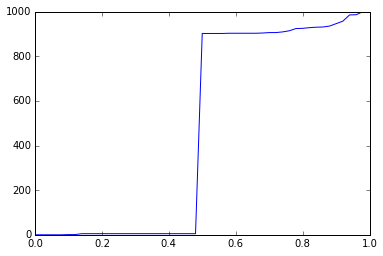

In [16]:
values, base = np.histogram(results[results.Step==24]["Median"], bins=np.linspace(0,1,51))
cdf = np.cumsum(values)
plt.plot(base[:-1], cdf)

In [17]:
import pyobjclipboard
pyobjclipboard.copy_object((base, cdf))

## Deep dive into one run

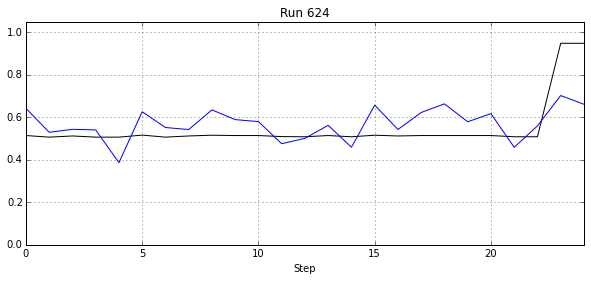

In [18]:
#run_choice = 796
run_choice = 83
fig, ax = plt.subplots(figsize=(10, 4))
subset = results[results.Iteration==run_choice]
subset.plot(x="Step", y="Median", color='k', ax=ax, legend=False)
subset.plot(x="Step", y="Mean", color='b', ax=ax, legend=False)

ax.set_ylim(0, 1.05)
ax.set_title("Run " + str(i))
ax.grid(True)

In [19]:
subset

,Step,Mean,Median,Iteration
0,0,0.641851,0.514000,83
1,1,0.529272,0.506500,83
2,2,0.543304,0.512000,83
3,3,0.540357,0.506500,83
4,4,0.386426,0.506500,83
5,5,0.626012,0.516000,83
6,6,0.551750,0.506500,83
7,7,0.542118,0.512000,83
8,8,0.634671,0.515486,83
9,9,0.588950,0.514000,83


In [20]:
m = model_runs[run_choice]

In [21]:
agent_positions = m.agent_vars.copy()
agent_positions.reset_index(inplace=True)

(0, 1.05)

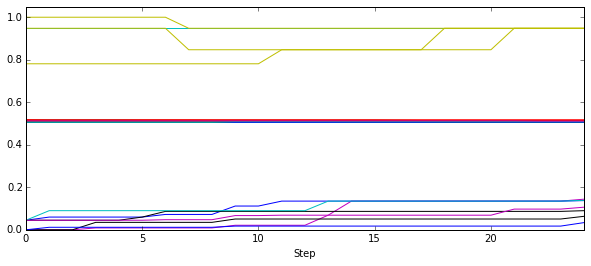

In [22]:
fig, ax = plt.subplots(figsize=(10, 4))

for i, group in agent_positions.groupby("AgentID"):
    group.plot(x="Step", y="Position", ax=ax, legend=False)

ax.set_ylim(0, 1.05)

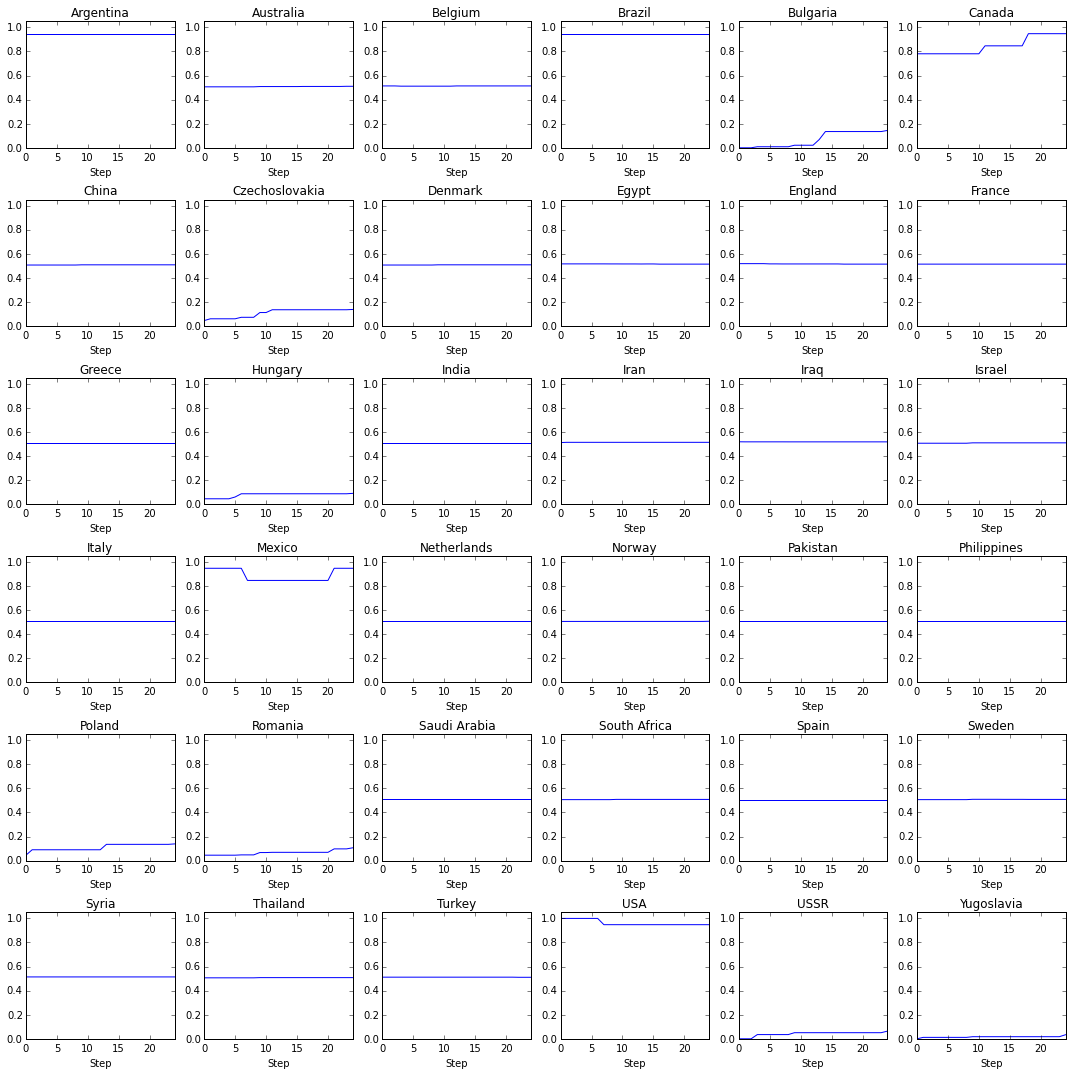

In [23]:
fig = plt.figure(figsize=(15, 15))
fig_num = 1

for name, group in agent_positions.groupby("AgentID"):
    ax = fig.add_subplot(6,6,fig_num)
    group.plot(x="Step", y="Position", ax=ax, legend=False)
    ax.set_title(name)
    ax.set_ylim(0, 1.05)
    fig_num += 1

fig.tight_layout()

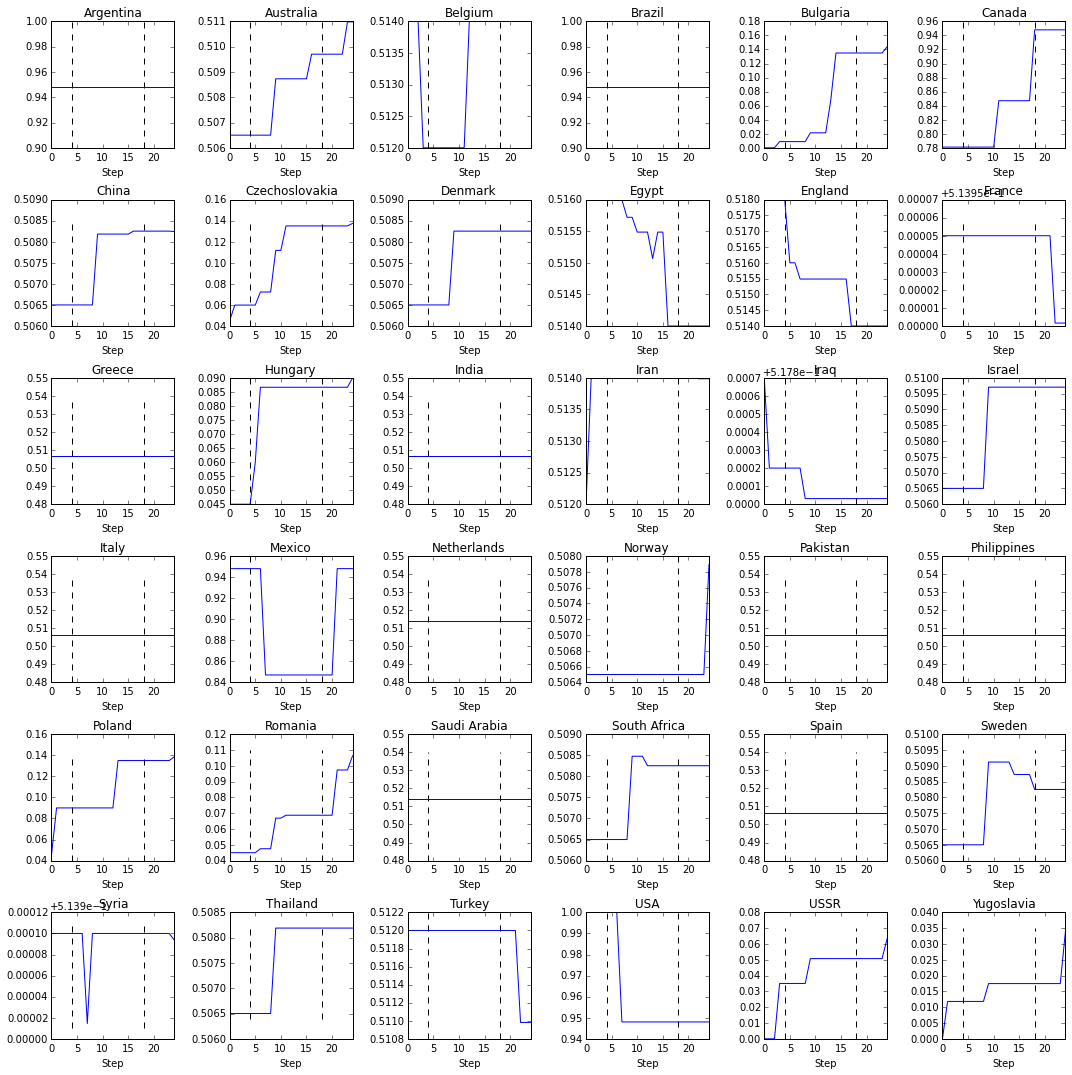

In [24]:
fig = plt.figure(figsize=(15, 15))
fig_num = 1

for name, group in agent_positions.groupby("AgentID"):
    ax = fig.add_subplot(6,6,fig_num)
    group.plot(x="Step", y="Position", ax=ax, legend=False)
    y0, y1 = ax.get_ylim()
    ax.vlines(4, y0, y1, linestyles='--')
    ax.vlines(18, y0, y1, linestyles='--')
    ax.set_title(name)
    # ax.set_ylim(0, 1.05)
    fig_num += 1
    

fig.tight_layout()

In [25]:
fig.savefig("Output.png", dpi=300)

In [26]:
m.log.get_events(action="Attack")

[Event(source='Belgium', target='Iran', timestamp=0, action='Attack'),
 Event(source='England', target='Iraq', timestamp=0, action='Attack'),
 Event(source='Iran', target='Belgium', timestamp=0, action='Attack'),
 Event(source='Iraq', target='England', timestamp=0, action='Attack'),
 Event(source='Belgium', target='Turkey', timestamp=2, action='Attack'),
 Event(source='Turkey', target='Belgium', timestamp=2, action='Attack'),
 Event(source='Czechoslovakia', target='Hungary', timestamp=4, action='Attack'),
 Event(source='Egypt', target='England', timestamp=4, action='Attack'),
 Event(source='England', target='Egypt', timestamp=4, action='Attack'),
 Event(source='Hungary', target='Czechoslovakia', timestamp=4, action='Attack'),
 Event(source='Argentina', target='USA', timestamp=6, action='Attack'),
 Event(source='USA', target='Argentina', timestamp=6, action='Attack'),
 Event(source='France', target='Syria', timestamp=7, action='Attack'),
 Event(source='Syria', target='France', timestamp

In [27]:
# Average unweighted postion

In [28]:
average_position = agent_positions.groupby("Step").aggregate("mean")

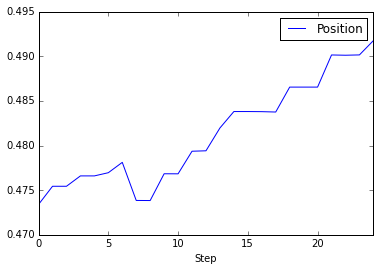

In [29]:
average_position.plot()

# Agent position analysis

In [30]:
all_dfs = []
for i, model in enumerate(model_runs):
    df = model.agent_vars.copy()
    df.reset_index(inplace=True)
    df["Iteration"] = i
    all_dfs.append(df)
agent_positions = pd.concat(all_dfs)

In [31]:
agent_positions.tail()

,Step,AgentID,Position,Iteration
895,24,Thailand,0.506500,999
896,24,Turkey,0.513153,999
897,24,USA,0.948000,999
898,24,USSR,0.005371,999
899,24,Yugoslavia,0.012684,999


## How far do agents end up from their starting position?

In [32]:
end_positions = agent_positions[agent_positions.Step==24]\
    .groupby("AgentID")["Position"].aggregate([np.mean, np.std])

end_positions = end_positions.rename(columns={"mean": "EndPos_mean",
                             "std": "EndPos_std"})

In [33]:
end_positions = end_positions.merge(book_data, left_index=True, right_on="Country")

In [34]:
end_positions.EndPos_std.mean()

0.022405189108095396

In [35]:
end_positions["Delta"] = end_positions.EndPos_mean - end_positions.Position

0.0142093621278
-0.0610065350421
0.111392062624


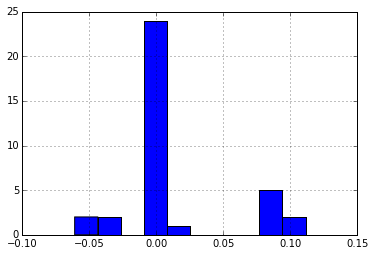

In [36]:
print(end_positions.Delta.mean())
print(end_positions.Delta.min())
print(end_positions.Delta.max())
end_positions.Delta.hist()

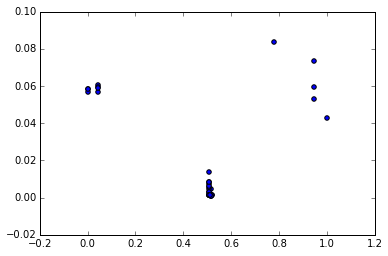

In [37]:
plt.scatter(end_positions.Position, end_positions.EndPos_std)

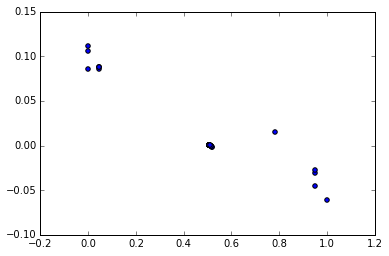

In [38]:
plt.scatter(end_positions.Position, end_positions.Delta)

In [39]:
end_positions.corr()

,EndPos_mean,EndPos_std,Capability,Position,Delta
EndPos_mean,1.000000,-0.112001,0.141162,0.998021,-0.917704
EndPos_std,-0.112001,1.000000,0.159979,-0.168368,0.460295
Capability,0.141162,0.159979,1.000000,0.134039,-0.086307
Position,0.998021,-0.168368,0.134039,1.000000,-0.940868
Delta,-0.917704,0.460295,-0.086307,-0.940868,1.000000


In [40]:
end_positions.corr(method='spearman')

,EndPos_mean,EndPos_std,Capability,Position,Delta
EndPos_mean,1.000000,-0.293951,-0.040932,0.967689,-0.790991
EndPos_std,-0.293951,1.000000,0.301197,-0.248572,0.333848
Capability,-0.040932,0.301197,1.000000,0.030859,-0.036041
Position,0.967689,-0.248572,0.030859,1.000000,-0.884167
Delta,-0.790991,0.333848,-0.036041,-0.884167,1.000000


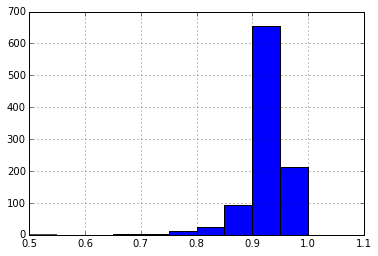

In [41]:
agent_positions[(agent_positions.AgentID=="USA") & 
                (agent_positions.Step==24)]["Position"].hist(bins=np.linspace(0.5, 1, 11))

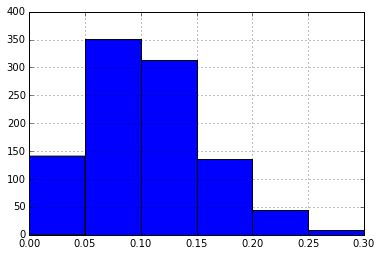

In [42]:
agent_positions[(agent_positions.AgentID=="USSR") & 
                (agent_positions.Step==24)]["Position"].hist(bins=np.linspace(0, 0.3, 7))

# Conflict frequencies

In [43]:
actors = book_data.Country.unique()

In [44]:
conflict_dyads = Counter()
conflict_models = defaultdict(set)

for i, model in enumerate(model_runs):
    #if model.model_vars.Median[24] < 0.75:
    #    continue
    for event in model.log.get_events(action="Attack"):
        if event.timestamp > 25: # Max steps to consider
            continue
        source = event.source
        target = event.target
        dyad = (source, target)
        if (target, source) in conflict_dyads:
            dyad = (target, source)
        conflict_dyads[dyad] += 0.5
        conflict_models[dyad].add(i)

conflict_models = {k: len(v) for k, v in conflict_models.items()}        
        
# Fill in zeroes
for source, target in permutations(actors, 2):
    dyad = (source, target)
    if (target, source) in conflict_dyads:
        dyad = (target, source)
    if dyad not in conflict_dyads:
        conflict_dyads[dyad] = 0
    if dyad not in conflict_models:
        conflict_models[dyad] = 0

In [45]:
conflict_dyads.most_common(10)

[(('England', 'Iraq'), 1436.0),
 (('Egypt', 'England'), 1235.0),
 (('Belgium', 'France'), 1156.0),
 (('Belgium', 'Iran'), 1044.0),
 (('Argentina', 'USA'), 940.0),
 (('Belgium', 'Egypt'), 880.0),
 (('Argentina', 'Brazil'), 715.0),
 (('Egypt', 'Iraq'), 704.0),
 (('Belgium', 'Netherlands'), 625.0),
 (('Argentina', 'Canada'), 566.0)]

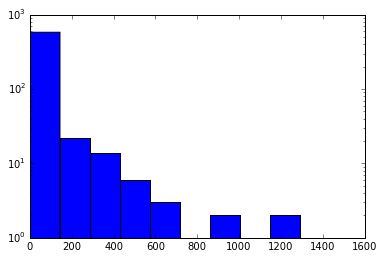

In [46]:
plt.hist(list(conflict_dyads.values()))
plt.yscale('log')

## Load MID data

In [47]:
COW = "/Users/dmasad/Data/COW/"
mid_a = pd.read_csv(COW + "MIDA_4.01.csv")
mid_b = pd.read_csv(COW + "MIDB_4.01.csv")

In [48]:
start_year = 1948
end_year = 1998
#end_year = 1948 + 5

mid_a = mid_a[(mid_a.StYear >= start_year) & (mid_a.StYear <= end_year)]
mid_b = mid_b[(mid_b.StYear >= start_year) & (mid_b.StYear <= end_year)]

### Get state names

In [49]:
state_names = pd.read_csv(COW + "SystemMembership2011/states2011.csv")
#state_names = state_names[["stateabb", "statenme"]]
state_names = state_names[["ccode", "statenme"]]
state_names.drop_duplicates(inplace=True)

In [50]:
name_dict = state_names.set_index("statenme").to_dict()["ccode"]

In [51]:
for name in book_data.Country.unique():
    if name not in name_dict:
        print(name)

England
USSR
USA


In [52]:
state_names.replace("United Kingdom", "England", inplace=True)
state_names.replace("United States of America", "USA", inplace=True)
state_names.replace("Russia", "USSR", inplace=True)

In [53]:
#mid_b2 = mid_b.merge(state_names, how="left", left_on="ccode", right_on="stateabb")
mid_b = mid_b.merge(state_names, how="left", on="ccode")

In [54]:
observed_mids = defaultdict(int)
for dispnum, group in mid_b.groupby("DispNum3"):
    sides = {}
    for side, rows in group.groupby("SideA"):
        sides[side] = rows.statenme.unique()
    # Build dyads
    for side_a in sides[0]:
        for side_b in sides[1]:
            observed_mids[(side_a, side_b)] += 1
            observed_mids[(side_b, side_a)] += 1
observed_mids = dict(observed_mids)

In [55]:
observed_mids = pd.DataFrame({"Observed_MIDs": observed_mids})
observed_mids.reset_index(inplace=True)
observed_mids.rename(columns={"level_0": "Source_Country",
                               "level_1": "Target_Country"}, inplace=True)

### Merge

In [56]:
predicted_conflicts = pd.DataFrame({"Predicted_Conflicts": dict(conflict_dyads)})
predicted_conflicts.reset_index(inplace=True)
predicted_conflicts.rename(columns={"level_0": "Source_Country",
                               "level_1": "Target_Country"}, inplace=True)

In [57]:
conflicts = predicted_conflicts.merge(observed_mids, 'left', 
                                      on=["Source_Country", "Target_Country"])
conflicts.fillna(0, inplace=True)

In [75]:
conflicts.Predicted_Conflicts /= 1000

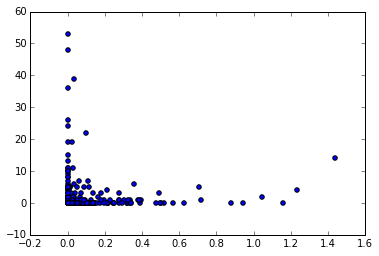

In [76]:
plt.scatter(conflicts.Predicted_Conflicts, conflicts.Observed_MIDs)

In [77]:
conflicts.corr()

,Predicted_Conflicts,Observed_MIDs,Const.,MID_Dummy,PredictedConflicts_Dummy
Predicted_Conflicts,1.000000,0.047551,NaN,0.140814,0.388829
Observed_MIDs,0.047551,1.000000,NaN,0.462268,0.063073
Const.,NaN,NaN,NaN,NaN,NaN
MID_Dummy,0.140814,0.462268,NaN,1.000000,0.085404
PredictedConflicts_Dummy,0.388829,0.063073,NaN,0.085404,1.000000


In [60]:
conflicts["Const."] = 1

In [83]:
lm = sm.OLS(conflicts.Observed_MIDs, conflicts[["Const.", "Predicted_Conflicts"]])
fit = lm.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:          Observed_MIDs   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.423
Date:                Wed, 09 Dec 2015   Prob (F-statistic):              0.233
Time:                        14:57:59   Log-Likelihood:                -1822.3
No. Observations:                 630   AIC:                             3649.
Df Residuals:                     628   BIC:                             3658.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Const.                  1.0431    

In [84]:
with open("lm_ex_1.pickle", "wb") as f:
    pickle.dump(fit, f)

In [79]:
conflicts["MID_Dummy"] = 0
conflicts["MID_Dummy"][conflicts.Observed_MIDs > 0] = 1

/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [85]:
logit = sm.Logit(conflicts.MID_Dummy, conflicts[["Const.", "Predicted_Conflicts"]])
fit = logit.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.533015
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              MID_Dummy   No. Observations:                  630
Model:                          Logit   Df Residuals:                      628
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Dec 2015   Pseudo R-squ.:                 0.01545
Time:                        14:58:07   Log-Likelihood:                -335.80
converged:                       True   LL-Null:                       -341.07
                                        LLR p-value:                  0.001170
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Const.                 -1.3001      0.101    -12.854      0.000        -1.498    -1.102
Pr

In [86]:
with open("logit_ex_1.pickle", "wb") as f:
    pickle.dump(fit, f)

In [81]:
conflicts["PredictedConflicts_Dummy"] = 0
conflicts["PredictedConflicts_Dummy"][conflicts.Predicted_Conflicts>0] = 1

/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [82]:
logit = sm.Logit(conflicts.MID_Dummy, conflicts[["Const.", "PredictedConflicts_Dummy"]])
fit = logit.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.537770
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              MID_Dummy   No. Observations:                  630
Model:                          Logit   Df Residuals:                      628
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Dec 2015   Pseudo R-squ.:                0.006664
Time:                        14:54:12   Log-Likelihood:                -338.80
converged:                       True   LL-Null:                       -341.07
                                        LLR p-value:                   0.03301
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Const.                      -1.3730      0.128    -10.692      0.000        -1.6

In [87]:
conflicts.to_csv("transfer/conflict_df_ex1.csv")

# Top conflict dyads

In [68]:
conflict_pairs = conflicts[["Source_Country", "Target_Country", 
                            "Predicted_Conflicts", "Observed_MIDs"]].copy()

In [73]:
conflict_pairs.sort("Predicted_Conflicts", ascending=False).head(10).to_clipboard()

In [74]:
conflict_pairs.sort("Observed_MIDs", ascending=False).head(10).to_clipboard()